In [11]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.ticker as mticker

In [2]:
df = pd.read_csv('youtube.csv')

In [3]:
df.head()

,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,13/11/2017,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,13/11/2017,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,12/11/2017,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False
3,3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,13/11/2017,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False
4,4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,12/11/2017,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161470 entries, 0 to 161469
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   index                   161470 non-null  int64 
 1   video_id                161470 non-null  object
 2   trending_date           161470 non-null  object
 3   title                   161470 non-null  object
 4   channel_title           161470 non-null  object
 5   category_id             161470 non-null  int64 
 6   publish_date            161470 non-null  object
 7   time_frame              161470 non-null  object
 8   published_day_of_week   161470 non-null  object
 9   publish_country         161470 non-null  object
 10  tags                    161470 non-null  object
 11  views                   161470 non-null  int64 
 12  likes                   161470 non-null  int64 
 13  dislikes                161470 non-null  int64 
 14  comment_count           161470 non-n

In [6]:
df.columns

Index(['index', 'video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_date', 'time_frame', 'published_day_of_week',
       'publish_country', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed'],
      dtype='object')

In [7]:
df.shape

(161470, 18)

In [8]:
df.nunique()

index                     161470
video_id                   55886
trending_date                205
title                      56905
channel_title              12361
category_id                   18
publish_date                 471
time_frame                    24
published_day_of_week          7
publish_country                4
tags                       50239
views                     132549
likes                      60628
dislikes                   14459
comment_count              22317
comments_disabled              2
ratings_disabled               2
video_error_or_removed         2
dtype: int64

In [10]:
df.isnull().sum()

index                     0
video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_date              0
time_frame                0
published_day_of_week     0
publish_country           0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

 ## Suggested Researches 

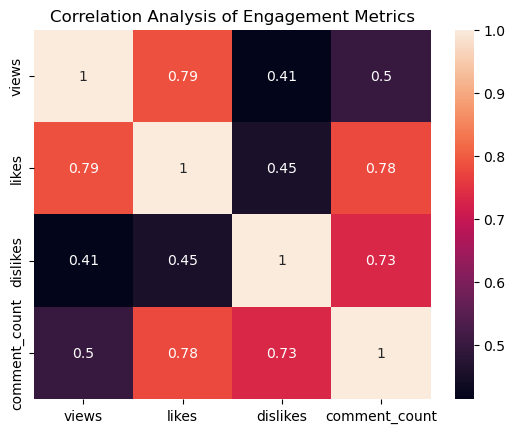

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

columns_of_interest = ['views', 'likes', 'dislikes', 'comment_count']
selected_columns = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Analysis of Engagement Metrics")
plt.show()

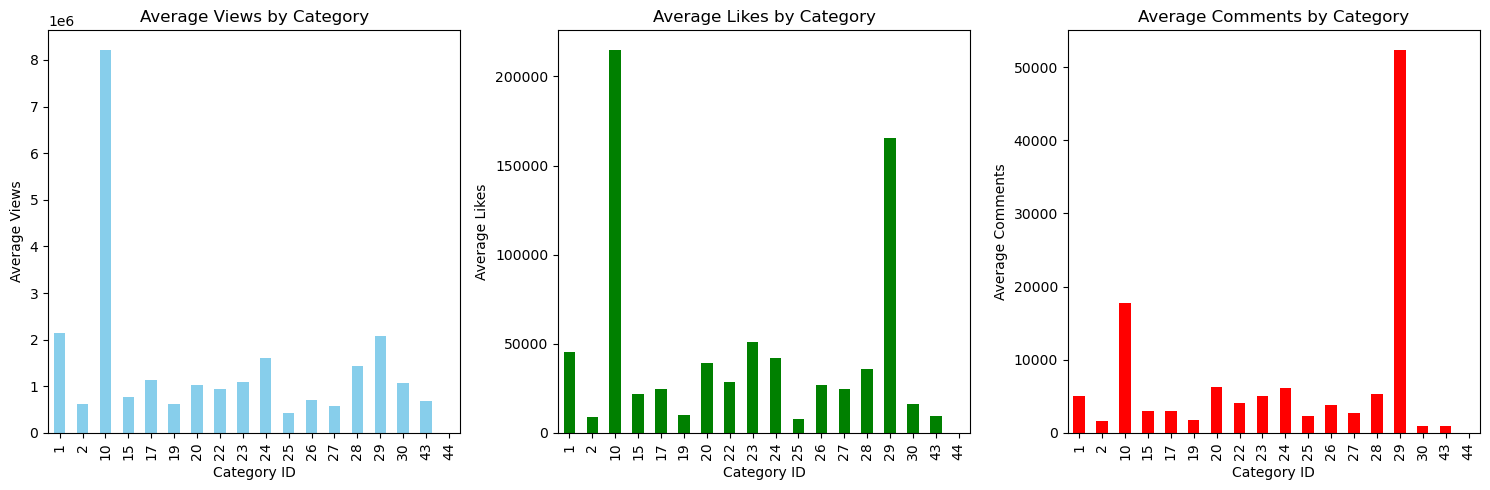

In [18]:
category_analysis = df.groupby('category_id')[['views', 'likes', 'comment_count']].mean()

plt.figure(figsize=(15, 5))

# Plotting average views by category
plt.subplot(1, 3, 1)
category_analysis['views'].plot(kind='bar', color='skyblue')
plt.title('Average Views by Category')
plt.xlabel('Category ID')
plt.ylabel('Average Views')

# Plotting average likes by category
plt.subplot(1, 3, 2)
category_analysis['likes'].plot(kind='bar', color='green')
plt.title('Average Likes by Category')
plt.xlabel('Category ID')
plt.ylabel('Average Likes')

# Plotting average comments by category
plt.subplot(1, 3, 3)
category_analysis['comment_count'].plot(kind='bar', color='red')
plt.title('Average Comments by Category')
plt.xlabel('Category ID')
plt.ylabel('Average Comments')

plt.tight_layout()
plt.show()


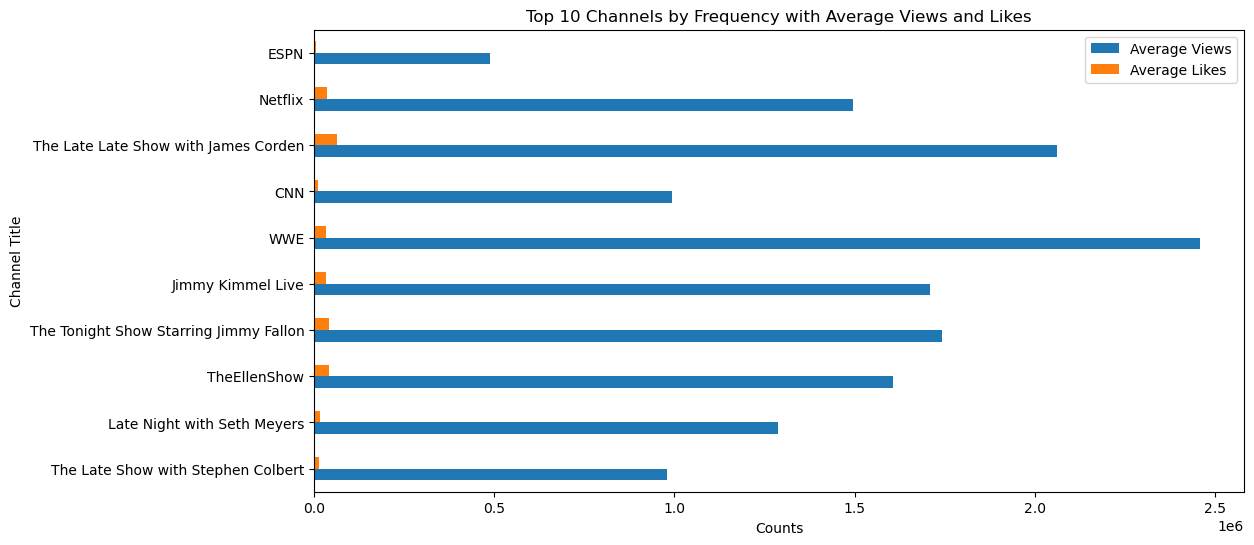

In [24]:
channel_frequency = df['channel_title'].value_counts()
channel_avg_views = df.groupby('channel_title')['views'].mean()
channel_avg_likes = df.groupby('channel_title')['likes'].mean()

channel_analysis = pd.DataFrame({
    'Frequency': channel_frequency, 
    'Average Views': channel_avg_views, 
    'Average Likes': channel_avg_likes
})

# Plotting the top 10 channels by frequency horizontally
top_channels = channel_analysis.sort_values(by='Frequency', ascending=False).head(10)
top_channels[['Average Views', 'Average Likes']].plot(kind='barh', figsize=(12, 6))
plt.title('Top 10 Channels by Frequency with Average Views and Likes')
plt.xlabel('Counts')
plt.ylabel('Channel Title')
plt.show()

 ## Trending Duration Analysis of Top Viewed Videos

In [27]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

# Sort videos by 'views'
sorted_videos = df.sort_values(by='views', ascending=False)

# Select the top videos (you can define how many top videos to consider)
top_videos = sorted_videos.drop_duplicates(subset=['video_id']).head(50)

# Calculate the duration of trending for each top video
top_videos['trending_duration'] = top_videos.groupby('video_id')['trending_date'].transform(lambda x: x.max() - x.min())

# Include relevant information
top_videos_info = top_videos[['video_id', 'title', 'channel_title', 'category_id', 'trending_duration']]

# Display the results
print(top_videos_info)

# Optional: You can calculate the average trending duration
average_duration = top_videos_info['trending_duration'].mean()
print(f"Average Trending Duration: {average_duration}")

          video_id                                              title  \
69361  _I_D_8Z4sJE  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...   
75409  9jI-z9QN6g8  Te Bote Remix - Casper, Nio GarcÃ­a, Darell, N...   
66494  kLpH1nSLJSs               Bad Bunny - Amorfoda | Video Oficial   
62111  wfWkmURBNv8           Ozuna x Romeo Santos - El Farsante Remix   
79350  VYOjWnS4cMY  Childish Gambino - This Is America (Official V...   
66885  xpVfcZ0ZcFM                               Drake - Godâ€™s Plan   
76669  ffxKSjUwKdU               Ariana Grande - No Tears Left To Cry   
76672  zEf423kYfqk  Becky G, Natti Natasha - Sin Pijama (Official ...   
49138  FlsCjmMhFmw  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
59124  sGIm0-dQd8M                Dura - Daddy Yankee (Video Oficial)   
44536  TyHvyGVs42U         Luis Fonsi, Demi Lovato - Ã‰chame La Culpa   
43743  2Vv-BfVoq4g        Ed Sheeran - Perfect (Official Music Video)   
75565  M4ZoCHID9GI     The Weeknd - Call Out My Nam

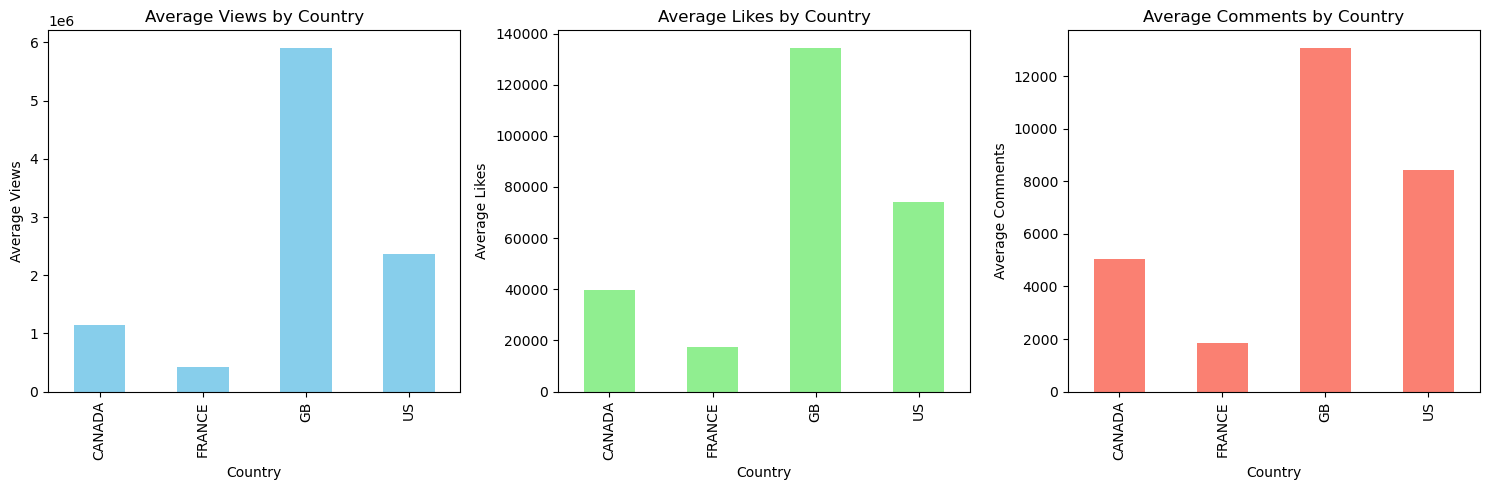

In [28]:
country_analysis = df.groupby('publish_country')[['views', 'likes', 'comment_count']].mean()

# Plotting the results for a visual representation
plt.figure(figsize=(15, 5))

# Plotting average views by country
plt.subplot(1, 3, 1)
country_analysis['views'].plot(kind='bar', color='skyblue')
plt.title('Average Views by Country')
plt.xlabel('Country')
plt.ylabel('Average Views')

# Plotting average likes by country
plt.subplot(1, 3, 2)
country_analysis['likes'].plot(kind='bar', color='lightgreen')
plt.title('Average Likes by Country')
plt.xlabel('Country')
plt.ylabel('Average Likes')

# Plotting average comments by country
plt.subplot(1, 3, 3)
country_analysis['comment_count'].plot(kind='bar', color='salmon')
plt.title('Average Comments by Country')
plt.xlabel('Country')
plt.ylabel('Average Comments')

plt.tight_layout()
plt.show()

In [32]:
from sklearn.feature_extraction.text import CountVectorizer


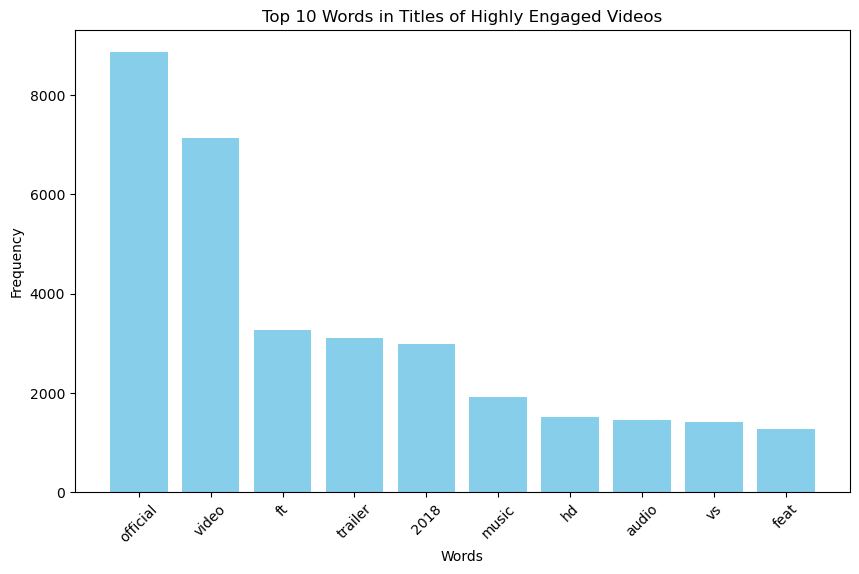

In [34]:
df['engagement_score'] = df['views'] + df['likes'] + df['comment_count']

# Select videos with high engagement
high_engagement_threshold = df['engagement_score'].quantile(0.75)
high_engagement_data = df[df['engagement_score'] >= high_engagement_threshold]

# Extract words from titles
vectorizer = CountVectorizer(stop_words='english', max_features=50)
title_matrix = vectorizer.fit_transform(high_engagement_data['title'])
title_words = vectorizer.get_feature_names_out()

# Sum the occurrences of each word
word_counts = title_matrix.sum(axis=0).A1
word_count_dict = dict(zip(title_words, word_counts))

# Sort words by frequency
sorted_word_counts = sorted(word_count_dict.items(), key=lambda x: x[1], reverse=True)

# Plot the top words
top_words = sorted_word_counts[:10]
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Words in Titles of Highly Engaged Videos')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

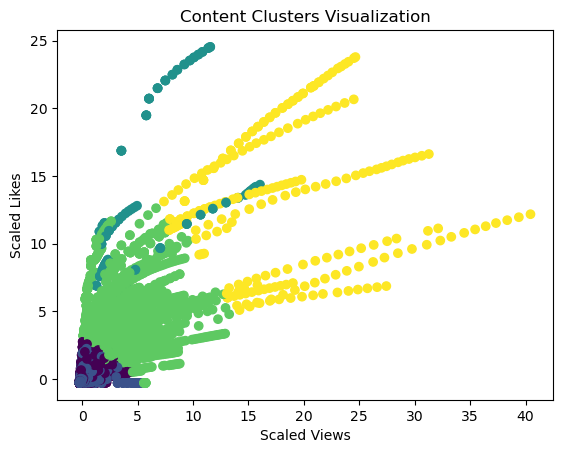

In [38]:
features = df[['views', 'likes', 'comment_count', 'category_id']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)  # Adjust 'n_init' to suppress the warning
clusters = kmeans.fit_predict(scaled_features)
df['cluster'] = clusters

# Analyzing the results using the corrected syntax
clustered_df = df.groupby('cluster')[['views', 'likes', 'comment_count', 'category_id']].mean()


# Optional: Visualizing the clusters (for two selected features)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Scaled Views')
plt.ylabel('Scaled Likes')
plt.title('Content Clusters Visualization')
plt.show()

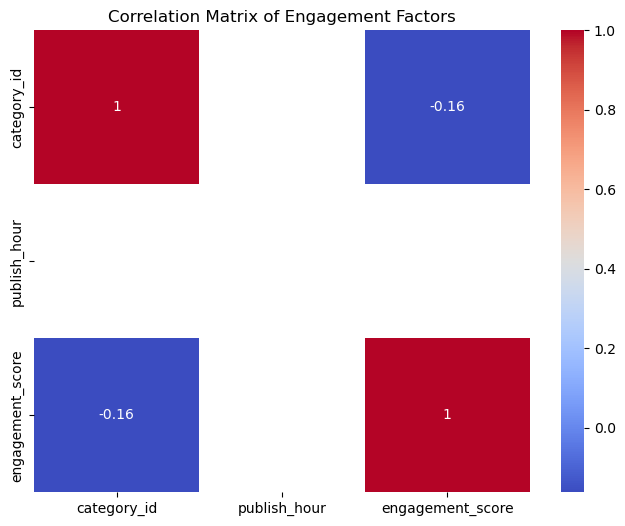

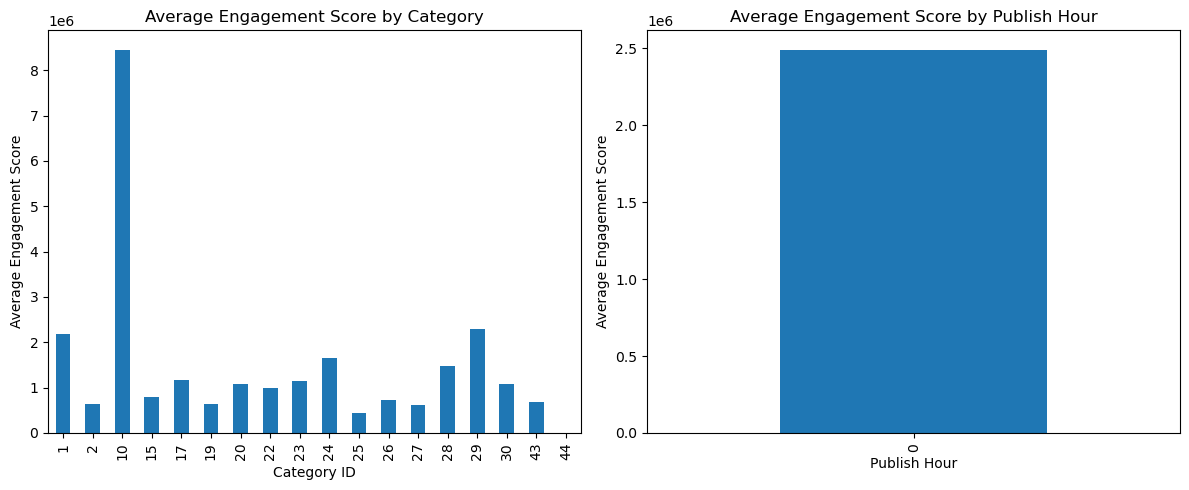

In [41]:
df['publish_date'] = pd.to_datetime(df['publish_date'], dayfirst=True)
df['publish_hour'] = df['publish_date'].dt.hour

# Creating an engagement score
df['engagement_score'] = df['views'] + df['likes'] + df['comment_count']

# Correlating category, publish hour with engagement score
correlation_matrix = df[['category_id', 'publish_hour', 'engagement_score']].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Engagement Factors')
plt.show()

# Analyzing average engagement score by category and publish hour
category_engagement = df.groupby('category_id')['engagement_score'].mean()
hour_engagement = df.groupby('publish_hour')['engagement_score'].mean()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
category_engagement.plot(kind='bar')
plt.title('Average Engagement Score by Category')
plt.xlabel('Category ID')
plt.ylabel('Average Engagement Score')

plt.subplot(1, 2, 2)
hour_engagement.plot(kind='bar')
plt.title('Average Engagement Score by Publish Hour')
plt.xlabel('Publish Hour')
plt.ylabel('Average Engagement Score')
plt.tight_layout()
plt.show()


## Predictive Trend Algorithm

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score


# Creating a binary target variable for high engagement (e.g., top 25% engagement score)
engagement_threshold = df['views'].quantile(0.75)
df['high_engagement'] = (df['views'] >= engagement_threshold).astype(int)

# Encoding categorical variables (like 'tags') and scaling the data
label_encoder = LabelEncoder()
df['tags_encoded'] = label_encoder.fit_transform(df['tags'])
df['category_id_encoded'] = label_encoder.fit_transform(df['category_id'])

# Selecting relevant features for the model
features = df[['tags_encoded', 'category_id_encoded']]
target = df['high_engagement']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predicting and evaluating the model
predictions = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.7483949546871452


In [45]:
!git init
!git add README.md
!git commit -m "YT treading "
!git branch -M main
!git remote add origin https://github.com/MehmoodBhutta/youtube-trend-dataset.git
!git push -u origin main

Initialized empty Git repository in /Users/mac/Desktop/untitled folder 2/.git/
fatal: pathspec 'README.md' did not match any files
On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Youtube Trending .ipynb
	youtube.csv

nothing added to commit but untracked files present (use "git add" to track)
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/MehmoodBhutta/youtube-trend-dataset.git'


In [46]:
!git add Youtube Trending .ipynb, youtube.csv

fatal: pathspec 'Youtube' did not match any files


In [ ]:
!git add Youtube Treading.ip